In [87]:
import pandas as pd # 데이터 프레임 패키지
import numpy as np # 수치계산 패키지
import matplotlib.pyplot as plt # 시각화 패키지1
import seaborn as sns # 시각화 패키지 2
import matplotlib
import pyscp
import datetime

In [88]:
matplotlib.rc('font',family='Malgun Gothic')

# P 사 연도별 매출액, 예상 매출액

In [89]:
x_year=[2019,2020,2021]
y_mat = [1.0,1.3,1.5]
y_stop = [8,10,14]
y_loss = [i+i*j/365 for i,j in zip(y_mat,y_stop)]
y_loss_rate = [i*j/365 for i,j in zip(y_mat,y_stop)]
y_loss_pred = [4.60/100,3.68/100,2.944/100]

In [90]:
y_loss_rate

[0.021917808219178082, 0.03561643835616438, 0.057534246575342465]

In [6]:
for i in range(len(y_mat)):
    print(y_mat[i]-y_loss[i])

-0.021917808219177992
-0.03561643835616435
-0.05753424657534256


In [7]:
y_loss

[1.021917808219178, 1.3356164383561644, 1.5575342465753426]

In [8]:
y_loss_rate

[0.021917808219178082, 0.03561643835616438, 0.057534246575342465]

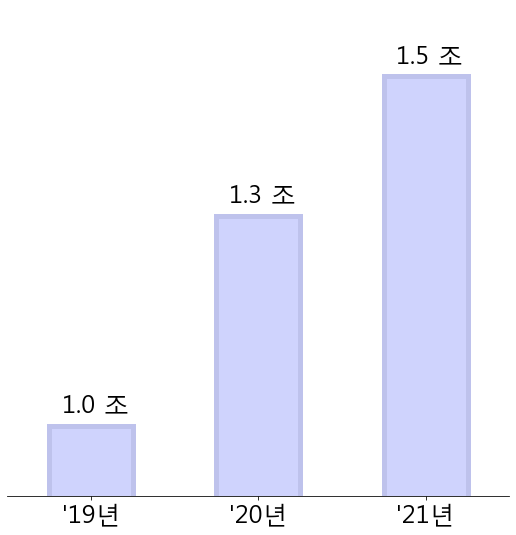

In [78]:
plt.figure(figsize=(9,9))
plt.bar(x_year,y_mat,color="#cfd3fd",edgecolor="#bec2ec",linewidth=5,width=0.5)
# plt.scatter(x=x_year, y=y_mat,label="실제 매출액")
# plt.plot(x_year,y_mat,marker="o",linewidth=5,markersize=20)
for i in range(len(x_year)):
    plt.annotate("%.1f 조"%y_mat[i], (x_year[i]-0.175, y_mat[i] + 0.02),fontsize=25,color='k')

# plt.scatter(x=x_year, y=y_loss,color='r',label="예상 매출액")

# plt.plot(x_year,y_loss,color='r')
# for i in range(len(x_year)):
#     plt.annotate("%.3f 조"%y_loss[i], (x_year[i]-0.1, y_loss[i] + 0.02),fontsize=20)
plt.xticks([2019,2020,2021],labels=["\'19년","\'20년","\'21년"],fontsize=25)
plt.xlim(2018.5,2021.5)
plt.ylim(0.9,1.6)
# plt.yticks([i*0.1+0.9 for i in range(8)],labels=["","1조","1조 1천억","1조 2천억","1조 3천억","1조 4천억","1조 5천억",""],fontsize=25)
plt.yticks([])
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# plt.ylabel("매출액",fontsize=15)
# plt.title("P 사 연도별 매출액, 예상 매출액",fontsize=20)
# plt.legend(fontsize=20)
plt.show()

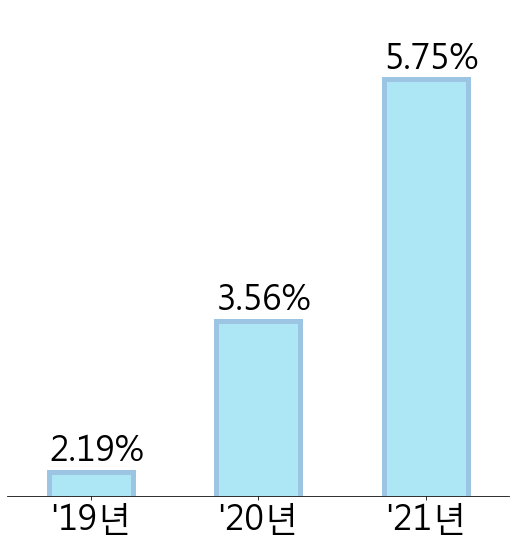

In [64]:
plt.figure(figsize=(9,9))
y_lim_min = min(y_loss_rate)
y_lim_max = max(y_loss_rate)
y_n_ticks = 10
# plt.scatter(x=x_year, y=y_loss_rate,alpha=0.8)
# plt.plot(x_year,y_loss_rate,marker="o",markersize=10,linewidth=5,color='c')
plt.bar(x_year,y_loss_rate,color="#ade6f4",edgecolor="#9cc5e3",linewidth=5,width=0.5)
for i in range(len(x_year)):
    plt.annotate("%.2f%%"%((y_loss_rate[i])*100), (x_year[i]-0.25, y_loss_rate[i]+0.001),fontsize=35,color='k')
plt.xticks([2019,2020,2021],labels=["\'19년","\'20년","\'21년"],fontsize=35)
plt.xlim(2018.5,2021.5)
plt.yticks([])
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(y_lim_min-0.1*y_lim_min,y_lim_max+0.3*y_lim_min)
# plt.yticks([i*(y_lim_max-y_lim_min) for i in range(y_n_ticks)])
# plt.ylabel("기회손실비용 비율",fontsize=30)
# plt.title("P 사 연도별 기회손실비용",fontsize=20)
plt.show()

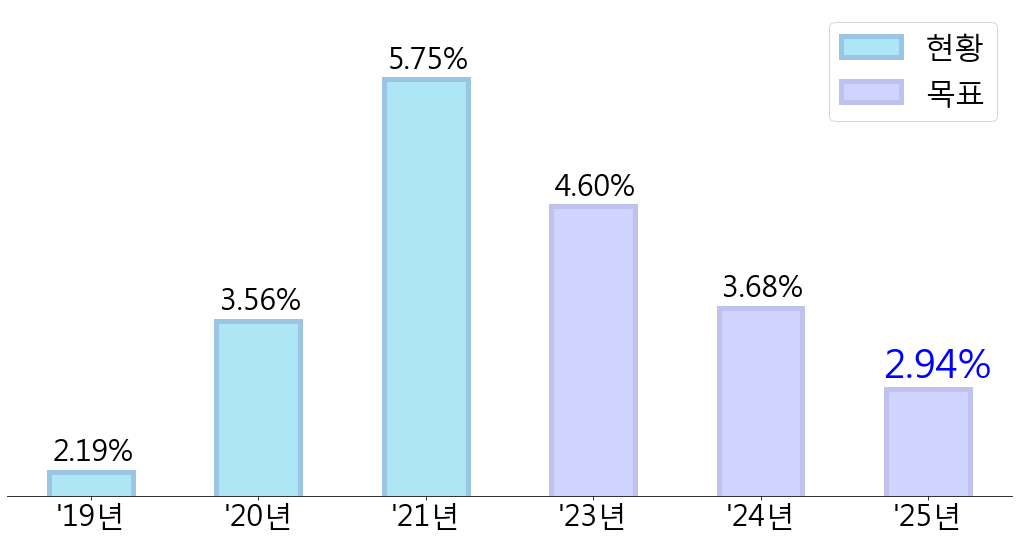

In [86]:
plt.figure(figsize=(18,9))

y_lim_min = min(y_loss_rate)
y_lim_max = max(y_loss_rate)
y_n_ticks = 10
# plt.scatter(x=x_year, y=y_loss_rate,alpha=0.8)
# plt.plot(x_year,y_loss_rate,marker="o",markersize=10,linewidth=5,color='c')
plt.bar(x_year,y_loss_rate,color="#ade6f4",edgecolor="#9cc5e3",linewidth=5,width=0.5,label="현황")
plt.bar([2022,2023,2024],y_loss_pred,color="#cfd3fd",edgecolor="#bec2ec",linewidth=5,width=0.5,label="목표")
for i in range(len(x_year)):
    plt.annotate("%.2f%%"%((y_loss_rate[i])*100), (x_year[i]-0.23, y_loss_rate[i]+0.001),fontsize=30,color='k')
for i in range(len(x_year)):
    if i==2:
        plt.annotate("%.2f%%"%((y_loss_pred[i])*100), ([2022,2023,2024][i]-0.27, y_loss_pred[i]+0.001),fontsize=40,color='b',weight='bold')
    else:
        plt.annotate("%.2f%%"%((y_loss_pred[i])*100), ([2022,2023,2024][i]-0.23, y_loss_pred[i]+0.001),fontsize=30,color='k')  
plt.xticks([2019,2020,2021,2022,2023,2024],labels=["\'19년","\'20년","\'21년","\'23년","\'24년","\'25년"],fontsize=30)
plt.xlim(2018.5,2024.5)
plt.yticks([])
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.ylim(y_lim_min-0.1*y_lim_min,y_lim_max+0.3*y_lim_min)
plt.legend(fontsize=30)
# plt.yticks([i*(y_lim_max-y_lim_min) for i in range(y_n_ticks)])
# plt.ylabel("기회손실비용 비율",fontsize=30)
# plt.title("P 사 연도별 기회손실비용",fontsize=20)
plt.show()

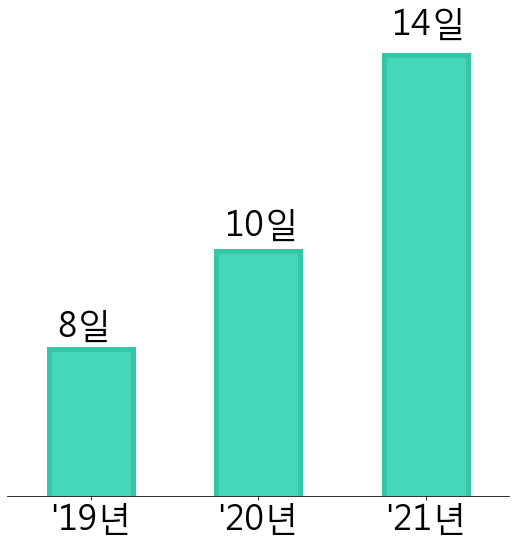

In [53]:
plt.figure(figsize=(9,9))
plt.bar(x_year,y_stop,color="#45d7b7",edgecolor='#34c6a6',linewidth=5,width=0.5)
# plt.plot(x_year,y_stop,marker="o",linewidth=5,markersize=20,color="#45d7b7")

plt.xticks([2019,2020,2021],labels=["\'19년","\'20년","\'21년"],fontsize=35)
for i in range(len(x_year)):
    plt.annotate("%d일"%y_stop[i], (x_year[i]-0.2, y_stop[i]*1.03),fontsize=35)
plt.ylim(5,15)
plt.xlim(2018.5,2021.5)
plt.yticks([])
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# plt.yticks([i*5 for i in range(1,4)],labels=["5일","10일","15일"],fontsize=25)
# plt.ylabel("공장중지일수",fontsize=15)
# plt.title("P 사 연도별 공장중지일수",fontsize=40)
plt.show()

In [12]:
[i for i in range(2010,2020)]

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [13]:
paper_volume=pd.DataFrame({"판지 및 포장용지":[203449,211013,214283,215567,226569,231983,236085,242291,240968,242207,248971],
                           "인쇄용지":[143335,141079,136607,132865,129394,125637,122645,121102,116426,110234,97208],
                           "기타용지":[45658,48028,48249,48440,48129,49312,50546,51803,51042,52674,54725]
                          },index=[i for i in range(2010,2021)])

In [14]:
paper_volume

,판지 및 포장용지,인쇄용지,기타용지
2010,203449,143335,45658
2011,211013,141079,48028
2012,214283,136607,48249
2013,215567,132865,48440
2014,226569,129394,48129
2015,231983,125637,49312
2016,236085,122645,50546
2017,242291,121102,51803
2018,240968,116426,51042
2019,242207,110234,52674


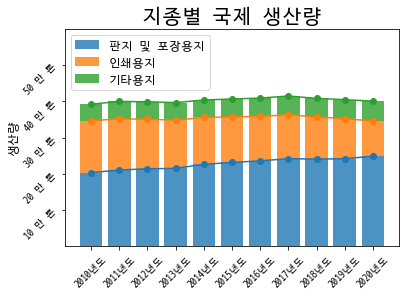

In [15]:
plt.bar(paper_volume.index,height=paper_volume["판지 및 포장용지"],label="판지 및 포장용지",alpha=0.8)
plt.plot(paper_volume["판지 및 포장용지"],marker="o")
plt.bar(paper_volume.index,bottom=paper_volume["판지 및 포장용지"],height=paper_volume["인쇄용지"],label="인쇄용지",alpha=0.8)
plt.plot(paper_volume["판지 및 포장용지"]+paper_volume["인쇄용지"],marker="o")
plt.bar(paper_volume.index,bottom=paper_volume["판지 및 포장용지"]+paper_volume["인쇄용지"],height=paper_volume["기타용지"],label="기타용지",alpha=0.8)
plt.plot(paper_volume["판지 및 포장용지"]+paper_volume["인쇄용지"]+paper_volume["기타용지"],marker="o")

plt.title("지종별 국제 생산량",fontsize=20)
plt.ylabel("생산량",fontsize=12)
plt.ylim(0,600000)
plt.yticks([100000,200000,300000,400000,500000],["%d 만 톤"%(i*10) for i in range(1,6)],rotation=45)
plt.xticks(paper_volume.index,["%d년도"%i for i in paper_volume.index],rotation=45)
plt.legend(loc="upper left",fontsize=12)
plt.show()

In [17]:
pd.read_excel("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data_exel/한솔_투자.xlsx")

,한솔 투자,산업용지,인쇄용지,특수지,기타 (IT/연구),합계
0,2022,7392,16330,13100,5475,42297
1,2023,14478,9298,18696,9955,52427
2,2024,14478,9598,18696,4645,47117


In [18]:
hansol_inv = pd.read_excel("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data_exel/한솔_투자.xlsx")

In [19]:
hansol_inv.set_index(hansol_inv["한솔 투자"],inplace=True,drop=True)
hansol_inv.drop("한솔 투자",axis=1,inplace=True)

In [20]:
hansol_inv

,산업용지,인쇄용지,특수지,기타 (IT/연구),합계
한솔 투자,,,,,
2022,7392,16330,13100,5475,42297
2023,14478,9298,18696,9955,52427
2024,14478,9598,18696,4645,47117


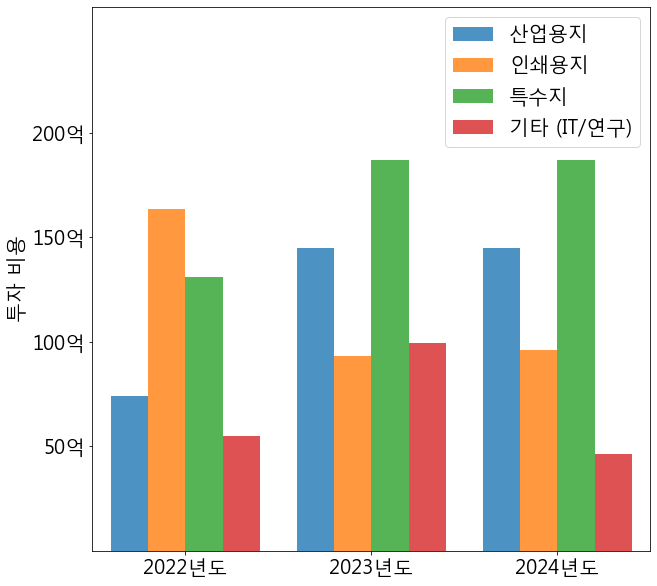

In [21]:
plt.figure(figsize=(10,10))
plt.bar(hansol_inv.index-0.4,height=hansol_inv["산업용지"],label="산업용지",alpha=0.8,width=0.2)
plt.bar(hansol_inv.index-0.2,height=hansol_inv["인쇄용지"],label="인쇄용지",alpha=0.8,width=0.2)
plt.bar(hansol_inv.index,height=hansol_inv["특수지"],label="특수지",alpha=0.8,width=0.2)
plt.bar(hansol_inv.index+0.2,height=hansol_inv["기타 (IT/연구)"],label="기타 (IT/연구)",alpha=0.8,width=0.2)
# plt.plot(hansol_inv["판지 및 포장용지"]+hansol_inv["인쇄용지"],marker="o")
# plt.bar(hansol_inv.index,bottom=hansol_inv["판지 및 포장용지"]+hansol_inv["인쇄용지"],height=hansol_inv["기타용지"],label="기타용지",alpha=0.8)
# plt.plot(hansol_inv["판지 및 포장용지"]+hansol_inv["인쇄용지"]+hansol_inv["기타용지"],marker="o")
# plt.title("지종별 국제 생산량")
# plt.ylabel("생산량")
# plt.ylim(0,600000)
# plt.yticks([100000,200000,300000,400000,500000],["%d 만 톤"%(i*10) for i in range(1,6)],rotation=45)
plt.ylabel("투자 비용",fontsize=20)
plt.ylim(0,26000)
# plt.title("한솔제지 투자비용",fontsize=20)
plt.xticks(hansol_inv.index-0.1,["%d년도"%i for i in hansol_inv.index],fontsize=20)
plt.yticks([5000,10000,15000,20000],["50억","100억","150억","200억"],fontsize=20)
plt.xlim(hansol_inv.index[0]-0.6,hansol_inv.index[-1]+0.4)
plt.legend(loc="best",fontsize=20)
plt.show()

In [22]:
1000000*5000

5000000000

In [23]:
hansol_sup = pd.read_excel("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data_exel/국내_지종별_공급현황.xlsx")
han = hansol_sup.set_index(hansol_sup.columns[0],drop=True)
col = hansol_sup.columns
han

,특수지,합계
Unnamed: 0,,
2018,345540,8552340
2019,406347,8454549
2020,406347,8722054


In [24]:
hansol_broad = pd.read_excel("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data_exel/국내_지종별_수출현황.xlsx")
han1 = hansol_broad.set_index(hansol_broad.columns[0],drop=True)
col1 = hansol_broad.columns
han1

,특수지,합계
Unnamed: 0,,
2018,60399,2863659
2019,406347,2837930
2020,406347,2699615


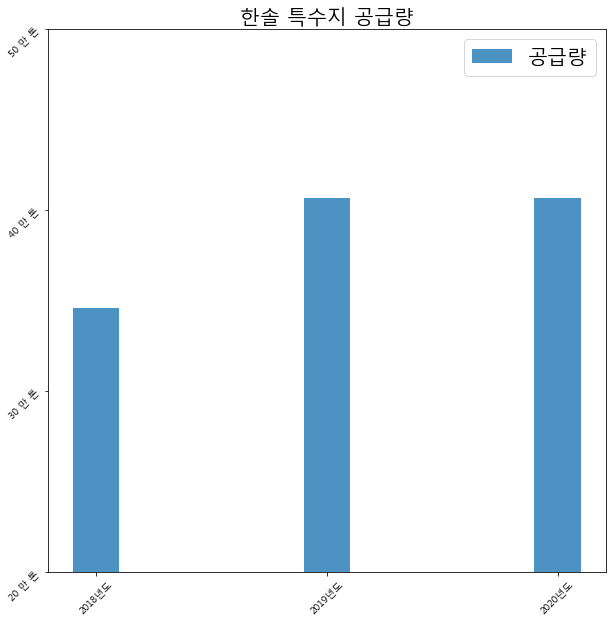

In [25]:

plt.figure(figsize=(10,10))
ax1=plt.bar(han.index,height=han[col[1]],label="공급량",alpha=0.8,width=0.2)
# ax1=plt.bar(han1.index+0.1,height=han1[col[1]],label="수출량",alpha=0.8,width=0.2)
plt.ylim(200000,450000)
plt.yticks([200000,300000,400000,500000],["%d 만 톤"%(i*10) for i in range(2,6)],rotation=45)
plt.title("한솔 특수지 공급량",fontsize=20)
plt.xticks(han.index,["%d년도"%i for i in han.index],rotation=45)
plt.legend(loc="best",fontsize=20)
plt.show()

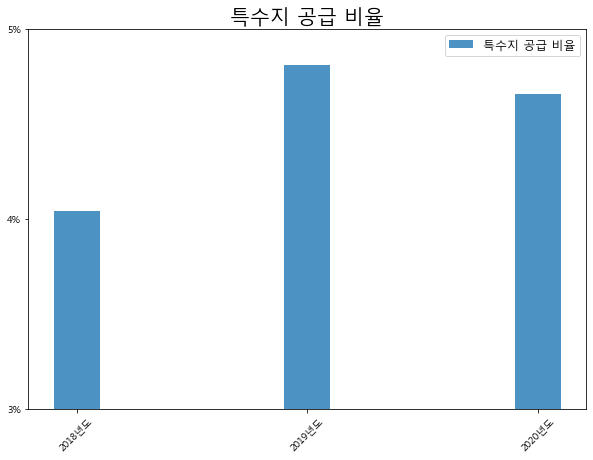

In [26]:
plt.figure(figsize=(10,7))
ax1=plt.bar(han.index,height=han[col[1]]/han[col[2]],label="특수지 공급 비율",alpha=0.8,width=0.2)
# plt.bar(han1.index+0.1,height=han1[col[1]]/han1[col[2]],label="특수지 수출 비율",alpha=0.8,width=0.2)
# plt.yticks([0.05,0.10,0.15],["5%","10%","15%"])
plt.yticks([0.03,0.04,0.05],["3%","4%","5%"])
plt.ylim(0.03,0.05)
plt.title("특수지 공급 비율",fontsize=20)
plt.xticks(han.index,["%d년도"%i for i in han.index],rotation=45)
plt.legend(loc="best",fontsize=12)
plt.show()

In [27]:
matplotlib.rc('font',family='D2Coding')

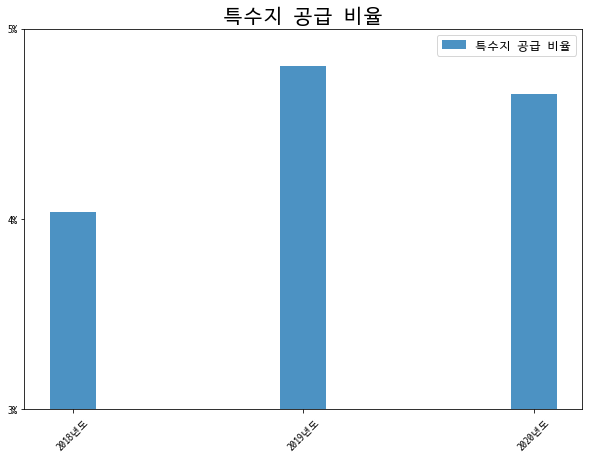

In [28]:
plt.figure(figsize=(10,7))
ax1=plt.bar(han.index,height=han[col[1]]/han[col[2]],label="특수지 공급 비율",alpha=0.8,width=0.2)
# plt.bar(han1.index+0.1,height=han1[col[1]]/han1[col[2]],label="특수지 수출 비율",alpha=0.8,width=0.2)
# plt.yticks([0.05,0.10,0.15],["5%","10%","15%"])
plt.yticks([0.03,0.04,0.05],["3%","4%","5%"])
plt.ylim(0.03,0.05)
plt.title("특수지 공급 비율",fontsize=20)
plt.xticks(han.index,["%d년도"%i for i in han.index],rotation=45)
plt.legend(loc="best",fontsize=12)
plt.show()

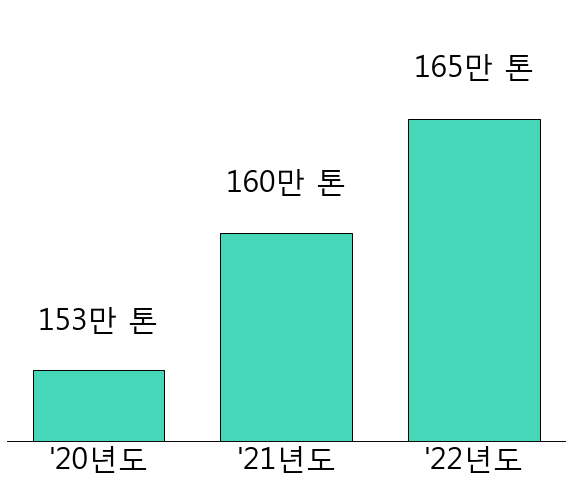

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame({'Year' : ['\'20년도', '\'21년도', '\'22년도'], 'Orders' : [1533000, 1596000, 1648000]})
fig, ax1 = plt.subplots(figsize = (10, 8))
# ax1.set_xlabel('Year', fontsize = 50)
# ax1.set_ylabel('생산량', fontsize = 30)
ax1.tick_params(axis='both', direction='in', labelsize = 30)
ax1.set_ylim(1500000, 1700000)
ax1.set_yticklabels([])
ax1.set_yticks([])
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
# ax1.set_yticklabels(['150만톤',' ',' ',' ' ,'160만톤',' ',' ',' ', '170만톤'],rotation=45)
ax2 = ax1.twinx()
bar = ax2.bar(df['Year'],  df['Orders'],color="#45d7b7",edgecolor="k",width=0.7)
ax2.tick_params(axis='y', direction='in')
ax2.set_ylim(1500000, 1700000)
ax2.axes.yaxis.set_visible(False)
ax2.set_yticks([])
for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height*1.01,'%.0f'%(height/10000)+'만 톤', ha='center', va='bottom', size = 30)
# plt.title('한솔 특수지 생산수량',fontsize=50)
# ax2.plot(df['Year'],  df['Orders'], marker="o",linewidth=5,markersize=15,alpha=0.8,color="#ff432a")
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['left'].set_visible(False) #왼쪽 테두리 제거
plt.show()

In [31]:
a=[hansol_inv["특수지"][2022],hansol_inv["특수지"][2023],hansol_inv["특수지"][2024]]

In [32]:
a

[13100, 18696, 18696]

In [33]:
whole = hansol_inv.sum().sum()/2

In [34]:
hansol_inv

,산업용지,인쇄용지,특수지,기타 (IT/연구),합계
한솔 투자,,,,,
2022,7392,16330,13100,5475,42297
2023,14478,9298,18696,9955,52427
2024,14478,9598,18696,4645,47117


In [35]:
(sum(a)/whole)*100

35.56000028170799

In [36]:
df_info = pd.read_csv("/home/piai/test/Big_Data_분석_기초/제지공장 프로젝트/data/원본데이터/03_중지리스트.csv",index_col="Unnamed: 0")
# start_date, end_date를 datetime 데이터형으로 변경
df_info["start_date"],df_info["end_date"]= list(map(pd.to_datetime,[df_info["start_date"],df_info["end_date"]]))
# df_info를 start_date 기준으로 오름차순.
df_info.sort_values("start_date",inplace=True)
df_info

,facility,cause,start_date,end_date
0,ALL,공정청소,2021-01-01 09:17:00,2021-01-01 10:17:00
1,ALL,계획보수,2021-01-03 08:21:00,2021-01-03 16:00:00
2,ALL,계획보수,2021-01-03 16:00:00,2021-01-03 20:25:00
3,3번 PRESS,불량중지,2021-01-03 21:39:00,2021-01-03 22:24:00
4,ALL,지종교체,2021-01-06 17:59:00,2021-01-06 18:16:00
...,...,...,...,...
506,2군 DRYER,불량중지,2021-12-28 14:16:00,2021-12-28 14:52:00
507,1군 DRYER,불량중지,2021-12-28 16:53:00,2021-12-28 17:35:00
508,ALL,공정청소,2021-12-30 00:00:00,2021-12-30 01:04:00
509,CALENDER,불량중지,2021-12-30 20:09:00,2021-12-30 20:23:00


In [37]:
df_info["start_date"]

0     2021-01-01 09:17:00
1     2021-01-03 08:21:00
2     2021-01-03 16:00:00
3     2021-01-03 21:39:00
4     2021-01-06 17:59:00
              ...        
506   2021-12-28 14:16:00
507   2021-12-28 16:53:00
508   2021-12-30 00:00:00
509   2021-12-30 20:09:00
510   2021-12-31 00:33:00
Name: start_date, Length: 511, dtype: datetime64[ns]

In [38]:
df_info["minutes"]=df_info["end_date"]-df_info["start_date"]

In [39]:
df_info["month"]=df_info["start_date"].dt.month

In [40]:
stop_count = df_info.loc[df_info["cause"]=="불량중지"].groupby(["month"]).count()["minutes"]#/datetime.timedelta(minutes=1)

In [41]:
stop_minute = df_info.loc[df_info["cause"]=="불량중지"].groupby(["month"]).sum()["minutes"]/datetime.timedelta(minutes=1)

/tmp/ipykernel_6062/1224988863.py:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.add is deprecated. In a future version, a TypeError will be raised. Before calling .add, select only columns which should be valid for the function.
  stop_minute = df_info.loc[df_info["cause"]=="불량중지"].groupby(["month"]).sum()["minutes"]/datetime.timedelta(minutes=1)
